In [1]:
import torch
from utils.dataset_utils import load_dataset, load_dataset_with_pairs
from tda.compute import analyze_and_plot_tda
# json_file = "/home/muzammal/Projects/safe_proj/long_safe_clip/dataset/visu/ViSU-Text_test.json"
# safe_img_dir = "/home/muzammal/Projects/safe_proj/long_safe_clip/dataset/visu/image/test_coco"
# nsfw_image_dir = "/home/muzammal/Projects/safe_proj/long_safe_clip/dataset/visu/image/test_nsfw_flux_sldr"
json_file = r"H:\ProjectsPro\safe_tda\data\dataset\ViSU-Text_train_5K.json"
safe_img_dir = r"H:\ProjectsPro\safe_tda\data\dataset\train_coco_5k"
nsfw_image_dir = r"H:\ProjectsPro\safe_tda\data\dataset\train_FLUX_Unsensored_5k"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
# Load data
print("Loading dataset...")
safe_texts, safe_image_paths, nsfw_texts, nsfw_image_paths = load_dataset(json_file, safe_img_dir, nsfw_image_dir)
# Load paired data for NSFW evaluations
# print("Loading paired dataset...")
# pairs, all_texts, all_image_paths = load_dataset_with_pairs(json_file, safe_img_dir, nsfw_image_dir)

D:\Anaconda\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
D:\Anaconda\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Using device: cuda
Loading dataset...
Loading dataset...
Loaded 5000 safe texts and 5000 NSFW texts
Loaded 5000 safe images and 5000 NSFW images


In [2]:
from utils.model_utils import load_clip
from utils.dataset_utils import extract_text_embeddings, extract_image_embeddings

model_name = "ViT-L/14"  # or "longclip"
clip_model, clip_preprocess, clip_tokenizer = load_clip(model_name, device)
print("-" * 30)

# --- Option A: Analyze Text Embeddings ---
print("Extracting safe TEXT embeddings...")
safe_text_embeddings = extract_text_embeddings(safe_texts, clip_model, clip_tokenizer, device, batch_size=64)
print("Extracting nsfw TEXT embeddings...")
nsfw_text_embeddings = extract_text_embeddings(nsfw_texts, clip_model, clip_tokenizer, device, batch_size=64)
analysis_label = "Text"
# --- Option B: Analyze Image Embeddings ---
# print("Extracting safe IMAGE embeddings...")
# safe_image_embeddings = extract_image_embeddings(safe_image_paths, clip_model, clip_preprocess, device, BATCH_SIZE_IMAGE)
# print("Extracting nsfw IMAGE embeddings...")
# nsfw_image_embeddings = extract_image_embeddings(nsfw_image_paths, clip_model, clip_preprocess, device, BATCH_SIZE_IMAGE)
# analysis_label = "Image"

Loading CLIP model...
------------------------------
Extracting safe TEXT embeddings...
Extracting TEXT embeddings...


Extracting text features:   0%|          | 0/79 [00:00<?, ?it/s]D:\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
Extracting text features: 100%|██████████| 79/79 [00:02<00:00, 30.34it/s]


text_features shape: torch.Size([5000, 768])
Extracting nsfw TEXT embeddings...
Extracting TEXT embeddings...


Extracting text features: 100%|██████████| 79/79 [00:02<00:00, 31.53it/s]

text_features shape: torch.Size([5000, 768])


H:\ProjectsPro\safe_tda\tda\compute.py:35: UserWarning: Falling back to manual Betti computation from persistence intervals.
  warnings.warn("Falling back to manual Betti computation from persistence intervals.", UserWarning)
D:\Anaconda\envs\pytorch\lib\site-packages\gudhi\persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


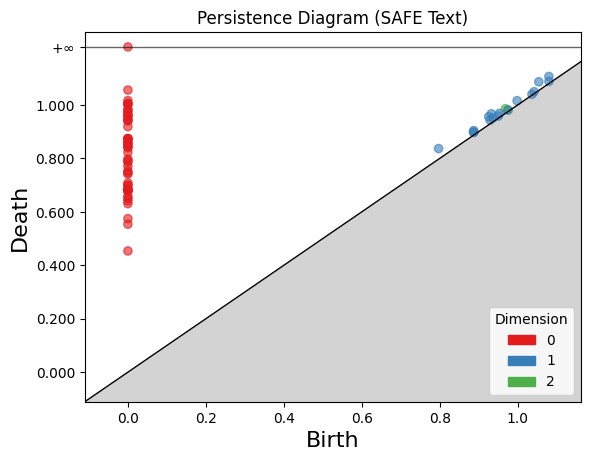

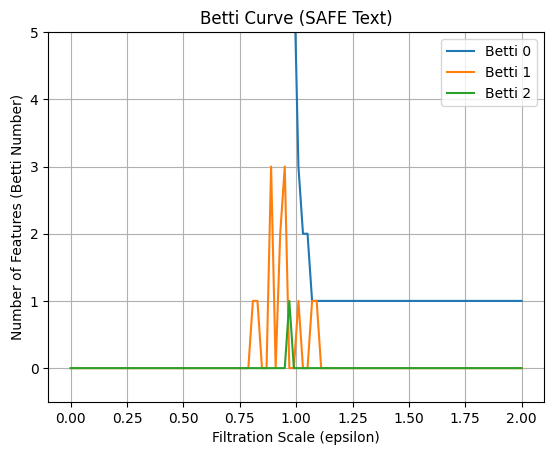

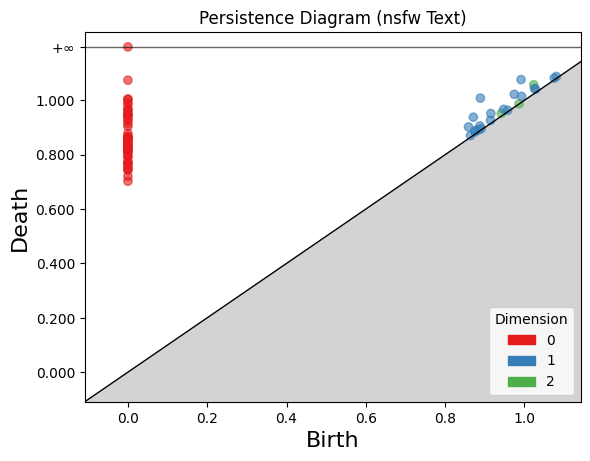

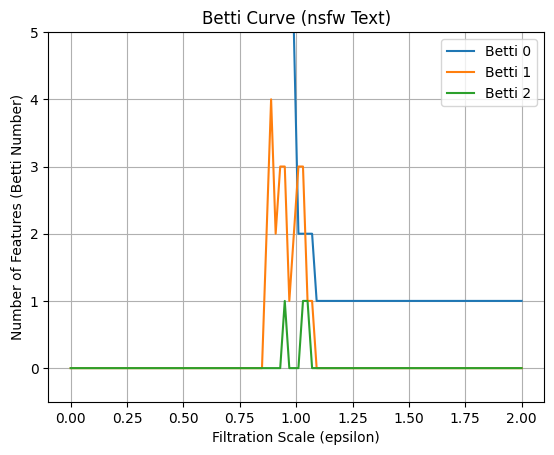

In [3]:
x = 1100
persistence_safe, betti_safe = analyze_and_plot_tda(safe_text_embeddings[x:x+50], f"SAFE {analysis_label}",complex='rips',max_filt_scale=2,max_hom_dim=5,threshold_count=100)
persistence_nsfw, betti_nsfw = analyze_and_plot_tda(nsfw_text_embeddings[x:x+50], f"nsfw {analysis_label}",complex='rips',max_filt_scale=2,max_hom_dim=5,threshold_count=100)

In [4]:
from tda.vectorize import vectorize_landscape, vectorize_persistence_image, vectorize_betti_curve, vectorize_simple_stats
import numpy as np
print("\n--- Vectorizing Features ---")

MAX_FILTRATION_SCALE = 2.0  # Adjust this based on your data
# --- Safe Data ---
# Persistence Landscape (H1, 3 landscapes, 100 samples between scale 0 and 1.5)
landscape_vec_safe = vectorize_landscape(persistence_safe, num_landscapes=3, resolution=100, x_min=0.0, x_max=MAX_FILTRATION_SCALE) 
# Persistence Image (H1, default params, 20x20 resolution)
image_vec_safe = vectorize_persistence_image(persistence_safe, resolution=[20, 20]) 
# Betti Curve Vector (sampling at 50 points)
betti_vec_safe = vectorize_betti_curve(betti_safe, num_samples=50, sample_scales=np.linspace(0, MAX_FILTRATION_SCALE, 50)) 
# Simple Stats (H0, H1)
stats_vec_safe = vectorize_simple_stats(persistence_safe, max_dim=1) 

print("Safe Vector Lengths:")
print(f"  Landscape (H1): {landscape_vec_safe.shape}")
print(f"  Image (H1): {image_vec_safe.shape}")
print(f"  Betti Curve: {betti_vec_safe.shape}")
print(f"  Simple Stats (H0, H1): {stats_vec_safe.shape}")


# --- nsfw Data (similar calls) ---
landscape_vec_nsfw = vectorize_landscape(persistence_nsfw, num_landscapes=3, resolution=100, x_min=0.0, x_max=MAX_FILTRATION_SCALE)
image_vec_nsfw = vectorize_persistence_image(persistence_nsfw, resolution=[20, 20])
betti_vec_nsfw = vectorize_betti_curve(betti_nsfw, num_samples=50, sample_scales=np.linspace(0, MAX_FILTRATION_SCALE, 50))
stats_vec_nsfw = vectorize_simple_stats(persistence_nsfw, max_dim=1)

print("\nnsfw Vector Lengths:")
print(f"  Landscape (H1): {landscape_vec_nsfw.shape}")
print(f"  Image (H1): {image_vec_nsfw.shape}")
print(f"  Betti Curve: {betti_vec_nsfw.shape}")
print(f"  Simple Stats (H0, H1): {stats_vec_nsfw.shape}")

# --- Now you can use these vectors (e.g., landscape_vec_safe, image_vec_nsfw) ---
# --- as input features for machine learning models ---


--- Vectorizing Features ---
Safe Vector Lengths:
  Landscape (H1): (300,)
  Image (H1): (400,)
  Betti Curve: (150,)
  Simple Stats (H0, H1): (16,)

nsfw Vector Lengths:
  Landscape (H1): (300,)
  Image (H1): (400,)
  Betti Curve: (150,)
  Simple Stats (H0, H1): (16,)


In [14]:

# 设定要比较的维度 (例如 H1)
compare_dimension = 1

# 1. 计算瓶颈距离 (Bottleneck Distance)
# 使用近似算法（通常更快，e=None 或 e > 0）
approx_bottleneck_dist = compute_bottleneck_distance(
    persistence_safe, 
    persistence_nsfw, 
    dimension=compare_dimension, 
    e=None # 或者设为一个小的正数，如 0.01
)
# 或者计算精确距离 (可能非常慢)
# exact_bottleneck_dist = compute_bottleneck_distance(
#     persistence_safe, 
#     persistence_nsfw, 
#     dimension=compare_dimension, 
#     e=0 
# )

print(f"\n--- Train-Free Distance Comparison (Example Pair) ---")
if approx_bottleneck_dist >= 0:
    print(f"Bottleneck Distance (Dim {compare_dimension}, approx): {approx_bottleneck_dist:.6f}")
# if exact_bottleneck_dist >= 0:
#    print(f"Bottleneck Distance (Dim {compare_dimension}, exact): {exact_bottleneck_dist:.6f}")


# 2. 计算 Wasserstein 距离 (Wasserstein Distance)
# 例如，计算 W_2 距离 (order=2)，使用 L_infinity 内部范数 (internal_p=np.inf, 这是计算点距离常用的方式)
wasserstein_dist_2 = compute_wasserstein_distance(
    persistence_safe, 
    persistence_nsfw, 
    dimension=compare_dimension, 
    order=2, 
    internal_p=np.inf 
)

# 或者计算 W_1 距离 (order=1)
wasserstein_dist_1 = compute_wasserstein_distance(
    persistence_safe, 
    persistence_nsfw, 
    dimension=compare_dimension, 
    order=1, 
    internal_p=np.inf
)

if wasserstein_dist_2 >= 0:
    print(f"Wasserstein Distance (Dim {compare_dimension}, order=2): {wasserstein_dist_2:.6f}")
if wasserstein_dist_1 >= 0:
    print(f"Wasserstein Distance (Dim {compare_dimension}, order=1): {wasserstein_dist_1:.6f}")

print("-" * 30)

# --- 解释 ---
# 输出的距离值越大，表示这两个持久性图（即 Safe 和 NSFW 样本集的拓扑结构）
# 在所选维度上的差异越大。
#
# 重要提示：这只是比较了 *一对* N=50 样本集的结果。为了得出可靠结论，
# 你需要像上一个回答中提到的那样，进行多次采样，计算多对距离
# （Safe vs NSFW, Safe vs Safe, NSFW vs NSFW），
# 然后比较这些距离的 *分布* 是否有显著差异。